In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../")
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import seaborn as sns
from simulation import *

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [4]:
D = torch.load("simulation_log/example/D.pt")
D_WOOD = torch.load("simulation_log/example/D_WOOD.pt")
D_GAN = torch.load("simulation_log/example/D_GAN.pt")
G_GAN = torch.load("simulation_log/example/G_GAN.pt")
OOD_BATCH = torch.load("simulation_log/example/OOD_BATCH.pt")
OOD_X = torch.load("simulation_log/example/OOD_X.pt")
OOD_X_TEST = torch.load("simulation_log/example/OOD_X_TEST.pt")
IND_X = torch.load("simulation_log/example/IND_X.pt")
IND_X_TEST = torch.load("simulation_log/example/IND_X_TEST.pt")
IND_Y = torch.load("simulation_log/example/IND_Y.pt")
IND_Y_TEST = torch.load("simulation_log/example/IND_Y_TEST.pt")
SAMPLERS = torch.load('simulation_log/example/samplers.pt')
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST = torch.load('simulation_log/example/raw_data.pt')

In [68]:
IND_CLS = [0, 1, 2]
OOD_CLS = [3]
IND_DATA, IND_X, IND_Y = cls_to_dset(IND_CLS, X_TRAIN, Y_TRAIN)
OOD_DATA, OOD_X, OOD_Y = cls_to_dset(OOD_CLS, X_TRAIN, Y_TRAIN)
IND_DATA_TEST, IND_X_TEST, IND_Y_TEST = cls_to_dset(IND_CLS, X_TEST, Y_TEST)
OOD_DATA_TEST, OOD_X_TEST, OOD_Y_TEST = cls_to_dset(OOD_CLS, X_TEST, Y_TEST)

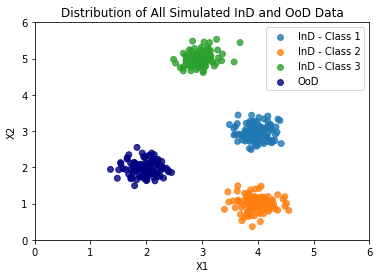

In [65]:
# Dataset
IND_CLS = [0, 1, 2]
OOD_CLS = [3]
for idx in IND_CLS:
    sample_idx = np.random.choice(1000, 100, replace=False)
    plt.scatter(IND_X[:,0][IND_Y==idx][sample_idx], IND_X[:,1][IND_Y==idx][sample_idx], label =f"InD - Class {idx+1}", sizes=[35]*len(IND_X),alpha=0.8)
sample_idx = np.random.choice(1000, 100, replace=False)
plt.scatter(OOD_X[:,0][sample_idx], OOD_X[:,1][sample_idx], c='navy', label ="OoD", sizes=[35]*len(OOD_X), alpha=0.8)
plt.xlim((0, 6))
plt.ylim((0, 6))
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Distribution of All Simulated InD and OoD Data")
# plt.show()
plt.savefig(f"simulation_log/plot/example_distribution.jpg", dpi=1500)

In [6]:
m, n_ind, n_ood = 300, 25, 25
xi = np.linspace(0, 6, m, endpoint=True)
yi = np.linspace(0, 6, m, endpoint=True)
xy_pos = np.array(list(product(xi, yi)))
zi = torch.softmax(D_WOOD(torch.tensor(xy_pos, dtype=torch.float32)), dim=-1)
print(zi.shape)
si = ood_wass_loss(zi)

torch.Size([90000, 3])


In [ ]:
threshold =calculate_accuracy(D=D_WOOD, ind=IND_X, ood=OOD_X, tnr=0.99)
mask = si > threshold

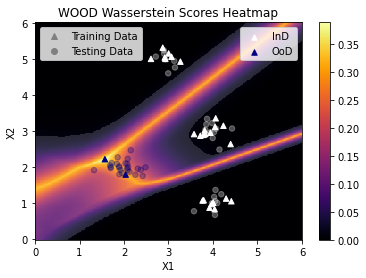

In [43]:
fig, ax = plt.subplots()
plt.pcolormesh(xi, yi, si.reshape((m, m)).T, shading='auto',cmap='inferno', alpha=1)
plt.colorbar()
plt.pcolormesh(xi, yi, mask.reshape((m, m)).T, shading='auto',cmap='gray', alpha=0.15)
# InD and OoD
ind_idx = np.random.choice(len(IND_X), n_ind, replace=False)
ood_idx = np.random.choice(len(OOD_X), n_ind, replace=False)
scatter = plt.scatter(IND_X[:,0][ind_idx], IND_X[:,1][ind_idx], c='white', label ="InD", marker='^',sizes=[30]*len(IND_X), alpha=1)
plt.scatter(OOD_BATCH[:,0], OOD_BATCH[:,1], c='navy', label="OoD",marker='^', sizes=[30]*len(OOD_X), alpha=1)
plt.scatter(IND_X_TEST[:,0][ind_idx], IND_X_TEST[:,1][ind_idx], c='white', sizes=[30]*len(IND_X), alpha=0.3)
plt.scatter(OOD_X[:,0][ood_idx], OOD_X[:,1][ood_idx], c='navy', sizes=[30]*len(OOD_X), alpha=0.3)
plt.title(f"WOOD Wasserstein Scores Heatmap")
plt.xlabel("X1")
plt.ylabel("X2")
# plt.annotate('OoD', xy=(1, 1), xytext =(1, 1), color='white') 
leg = plt.legend()
ax.add_artist(leg)
h = [plt.plot([],[], color="gray", marker=mk, ls="",ms=6)[0] for mk in ['^', 'o']]
plt.legend(handles=h, labels=['Training Data', 'Testing Data'], loc='upper left')
# plt.legend()
plt.savefig(f"simulation_log/plot/example_wood_old.jpg", dpi=1500)

In [8]:
m, n_ind, n_ood = 300, 25, 25
xi = np.linspace(0, 6, m, endpoint=True)
yi = np.linspace(0, 6, m, endpoint=True)
xy_pos = np.array(list(product(xi, yi)))
zi_gan = torch.softmax(D_GAN(torch.tensor(xy_pos, dtype=torch.float32)), dim=-1)
print(zi_gan.shape)
si_gan = ood_wass_loss(zi_gan)

torch.Size([90000, 3])


In [9]:
threshold_gan =calculate_accuracy(D=D_GAN, ind=IND_X, ood=OOD_X, tnr=0.99)
mask_gan = si_gan > threshold_gan

0.99: 1.0


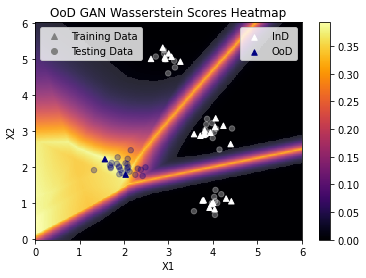

In [61]:
# plt.pcolormesh(xi, yi, mask.reshape((m, m)).T, shading='auto',cmap='gray', alpha=0.1)
fig, ax = plt.subplots()
plt.pcolormesh(xi, yi, si_gan.reshape((m, m)).T, shading='auto',cmap='inferno', alpha=1)
plt.colorbar()
plt.pcolormesh(xi, yi, mask_gan.reshape((m, m)).T, shading='auto',cmap='gray', alpha=0.15)
# InD and OoD
# ind_idx = np.random.choice(len(IND_X), n_ind, replace=False)
# ood_idx = np.random.choice(len(OOD_X), n_ind, replace=False)
scatter = plt.scatter(IND_X[:,0][ind_idx], IND_X[:,1][ind_idx], c='white', label ="InD", marker='^',sizes=[30]*len(IND_X), alpha=1)
plt.scatter(OOD_BATCH[:,0], OOD_BATCH[:,1], c='navy', label="OoD",marker='^', sizes=[30]*len(OOD_X), alpha=1)
plt.scatter(IND_X_TEST[:,0][ind_idx], IND_X_TEST[:,1][ind_idx], c='white', sizes=[30]*len(IND_X), alpha=0.3)
plt.scatter(OOD_X[:,0][ood_idx], OOD_X[:,1][ood_idx], c='navy', sizes=[30]*len(OOD_X), alpha=0.3)
plt.title(f"OoD GAN Wasserstein Scores Heatmap")
plt.xlabel("X1")
plt.ylabel("X2")
leg = plt.legend()
ax.add_artist(leg)
h = [plt.plot([],[], color="gray", marker=mk, ls="",ms=6)[0] for mk in ['^', 'o']]
plt.legend(handles=h, labels=['Training Data', 'Testing Data'], loc='upper left')
# plt.legend()
plt.savefig(f"simulation_log/plot/example_old.jpg", dpi=1500)

In [75]:
from simulation import *
D_WOOD = DSIM(64)
# D_WOOD = DSIM_SINGLE()
# OOD data preparation
n=1000
n_ood = 16
ood_bsz = 4
OOD_BATCH = torch.tensor(OOD_X[np.random.choice(n, n_ood, replace=False)], dtype=torch.float32)
# torch.save(OOD_BATCH, "simulation_log/model/ood_batch.pt")
print(f"OOD Batch Shape: {OOD_BATCH.shape}")
# Configuration
max_epoch = 256
lr = 1e-3
beta = 1
optimizer = torch.optim.Adam(D_WOOD.parameters(), lr=lr, betas=(0.9, 0.999))
criterion = nn.CrossEntropyLoss()
# Dataset
ind_tri_loader = torch.utils.data.DataLoader(IND_DATA, shuffle=True, batch_size=256)
ind_val_loader = torch.utils.data.DataLoader(IND_DATA_TEST, shuffle=True, batch_size=256)
# Training
D_WOOD = wood_training(D_WOOD, OOD_BATCH, ood_bsz, beta, criterion, optimizer, ind_tri_loader, ind_val_loader, max_epoch, n_epoch=10)

OOD Batch Shape: torch.Size([16, 2])


  0%|          | 1/256 [00:00<03:10,  1.34it/s]

Epoch  # 1 | Tri loss: 0.7156                     | Tri accuracy: 0.3903
tensor(0.3799, grad_fn=<WassersteinBackward>)
Epoch  # 1 | Val loss: 0.9511                     | Val accuracy: 0.8214


  4%|▍         | 11/256 [00:06<02:18,  1.77it/s]

Epoch  # 11 | Tri loss: -0.1414                     | Tri accuracy: 1.0
tensor(0.3501, grad_fn=<WassersteinBackward>)
Epoch  # 11 | Val loss: 0.2007                     | Val accuracy: 1.0


  8%|▊         | 21/256 [00:12<02:01,  1.93it/s]

Epoch  # 21 | Tri loss: -0.2704                     | Tri accuracy: 1.0
tensor(0.3563, grad_fn=<WassersteinBackward>)
Epoch  # 21 | Val loss: 0.0871                     | Val accuracy: 1.0


 12%|█▏        | 31/256 [00:17<01:52,  2.00it/s]

Epoch  # 31 | Tri loss: -0.3231                     | Tri accuracy: 1.0
tensor(0.3568, grad_fn=<WassersteinBackward>)
Epoch  # 31 | Val loss: 0.0463                     | Val accuracy: 1.0


 16%|█▌        | 41/256 [00:22<01:46,  2.01it/s]

Epoch  # 41 | Tri loss: -0.3496                     | Tri accuracy: 1.0
tensor(0.3795, grad_fn=<WassersteinBackward>)
Epoch  # 41 | Val loss: 0.0292                     | Val accuracy: 1.0


 20%|█▉        | 51/256 [00:27<01:41,  2.02it/s]

Epoch  # 51 | Tri loss: -0.3633                     | Tri accuracy: 1.0
tensor(0.3835, grad_fn=<WassersteinBackward>)
Epoch  # 51 | Val loss: 0.0177                     | Val accuracy: 1.0


 24%|██▍       | 61/256 [00:32<01:35,  2.05it/s]

Epoch  # 61 | Tri loss: -0.3693                     | Tri accuracy: 1.0
tensor(0.3820, grad_fn=<WassersteinBackward>)
Epoch  # 61 | Val loss: 0.0106                     | Val accuracy: 1.0


 28%|██▊       | 71/256 [00:36<01:31,  2.03it/s]

Epoch  # 71 | Tri loss: -0.3792                     | Tri accuracy: 1.0
tensor(0.3842, grad_fn=<WassersteinBackward>)
Epoch  # 71 | Val loss: 0.0077                     | Val accuracy: 1.0


 32%|███▏      | 81/256 [00:41<01:24,  2.07it/s]

Epoch  # 81 | Tri loss: -0.3768                     | Tri accuracy: 1.0
tensor(0.3865, grad_fn=<WassersteinBackward>)
Epoch  # 81 | Val loss: 0.0054                     | Val accuracy: 1.0


 36%|███▌      | 91/256 [00:46<01:18,  2.11it/s]

Epoch  # 91 | Tri loss: -0.3825                     | Tri accuracy: 1.0
tensor(0.3912, grad_fn=<WassersteinBackward>)
Epoch  # 91 | Val loss: 0.0049                     | Val accuracy: 1.0


 39%|███▉      | 101/256 [00:51<01:13,  2.11it/s]

Epoch  # 101 | Tri loss: -0.3804                     | Tri accuracy: 1.0
tensor(0.3873, grad_fn=<WassersteinBackward>)
Epoch  # 101 | Val loss: 0.0035                     | Val accuracy: 1.0


 43%|████▎     | 111/256 [00:56<01:09,  2.08it/s]

Epoch  # 111 | Tri loss: -0.3864                     | Tri accuracy: 1.0
tensor(0.3872, grad_fn=<WassersteinBackward>)
Epoch  # 111 | Val loss: 0.0028                     | Val accuracy: 1.0


 47%|████▋     | 121/256 [01:00<01:05,  2.06it/s]

Epoch  # 121 | Tri loss: -0.3852                     | Tri accuracy: 1.0
tensor(0.3891, grad_fn=<WassersteinBackward>)
Epoch  # 121 | Val loss: 0.0024                     | Val accuracy: 1.0


 51%|█████     | 131/256 [01:05<01:00,  2.08it/s]

Epoch  # 131 | Tri loss: -0.3829                     | Tri accuracy: 1.0
tensor(0.3892, grad_fn=<WassersteinBackward>)
Epoch  # 131 | Val loss: 0.002                     | Val accuracy: 1.0


 55%|█████▌    | 141/256 [01:10<00:54,  2.09it/s]

Epoch  # 141 | Tri loss: -0.3869                     | Tri accuracy: 1.0
tensor(0.3867, grad_fn=<WassersteinBackward>)
Epoch  # 141 | Val loss: 0.0018                     | Val accuracy: 1.0


 59%|█████▉    | 151/256 [01:15<00:50,  2.10it/s]

Epoch  # 151 | Tri loss: -0.3848                     | Tri accuracy: 1.0
tensor(0.3858, grad_fn=<WassersteinBackward>)
Epoch  # 151 | Val loss: 0.0014                     | Val accuracy: 1.0


 63%|██████▎   | 161/256 [01:20<00:50,  1.89it/s]

Epoch  # 161 | Tri loss: -0.3873                     | Tri accuracy: 1.0
tensor(0.3911, grad_fn=<WassersteinBackward>)
Epoch  # 161 | Val loss: 0.0018                     | Val accuracy: 1.0


 67%|██████▋   | 171/256 [01:26<00:47,  1.79it/s]

Epoch  # 171 | Tri loss: -0.3875                     | Tri accuracy: 1.0
tensor(0.3906, grad_fn=<WassersteinBackward>)
Epoch  # 171 | Val loss: 0.0011                     | Val accuracy: 1.0


 71%|███████   | 181/256 [01:31<00:37,  2.01it/s]

Epoch  # 181 | Tri loss: -0.3872                     | Tri accuracy: 1.0
tensor(0.3873, grad_fn=<WassersteinBackward>)
Epoch  # 181 | Val loss: 0.0011                     | Val accuracy: 1.0


 75%|███████▍  | 191/256 [01:35<00:28,  2.24it/s]

Epoch  # 191 | Tri loss: -0.3895                     | Tri accuracy: 1.0
tensor(0.3916, grad_fn=<WassersteinBackward>)
Epoch  # 191 | Val loss: 0.0008                     | Val accuracy: 1.0


 79%|███████▊  | 201/256 [01:39<00:23,  2.30it/s]

Epoch  # 201 | Tri loss: -0.387                     | Tri accuracy: 1.0
tensor(0.3890, grad_fn=<WassersteinBackward>)
Epoch  # 201 | Val loss: 0.001                     | Val accuracy: 1.0


 82%|████████▏ | 211/256 [01:44<00:19,  2.32it/s]

Epoch  # 211 | Tri loss: -0.3829                     | Tri accuracy: 1.0
tensor(0.3815, grad_fn=<WassersteinBackward>)
Epoch  # 211 | Val loss: 0.0008                     | Val accuracy: 1.0


 86%|████████▋ | 221/256 [01:48<00:14,  2.35it/s]

Epoch  # 221 | Tri loss: -0.3859                     | Tri accuracy: 1.0
tensor(0.3897, grad_fn=<WassersteinBackward>)
Epoch  # 221 | Val loss: 0.0006                     | Val accuracy: 1.0


 90%|█████████ | 231/256 [01:52<00:10,  2.35it/s]

Epoch  # 231 | Tri loss: -0.3876                     | Tri accuracy: 1.0
tensor(0.3891, grad_fn=<WassersteinBackward>)
Epoch  # 231 | Val loss: 0.0006                     | Val accuracy: 1.0


 94%|█████████▍| 241/256 [01:57<00:06,  2.34it/s]

Epoch  # 241 | Tri loss: -0.3862                     | Tri accuracy: 1.0
tensor(0.3845, grad_fn=<WassersteinBackward>)
Epoch  # 241 | Val loss: 0.0004                     | Val accuracy: 1.0


 98%|█████████▊| 251/256 [02:01<00:02,  2.33it/s]

Epoch  # 251 | Tri loss: -0.3874                     | Tri accuracy: 1.0
tensor(0.3840, grad_fn=<WassersteinBackward>)
Epoch  # 251 | Val loss: 0.0004                     | Val accuracy: 1.0


100%|██████████| 256/256 [02:03<00:00,  2.07it/s]


In [76]:
m, n_ind, n_ood = 100, 25, 25
xi = np.linspace(0, 6, m, endpoint=True)
yi = np.linspace(0, 6, m, endpoint=True)
xy_pos = np.array(list(product(xi, yi)))
zi = torch.softmax(D_WOOD(torch.tensor(xy_pos, dtype=torch.float32)), dim=-1)
print(zi.shape)
si = ood_wass_loss(zi)

torch.Size([10000, 3])


In [77]:
threshold =calculate_accuracy(D=D_WOOD, ind=IND_X, ood=OOD_X, tnr=0.99)
mask = si > threshold

0.99: 1.0


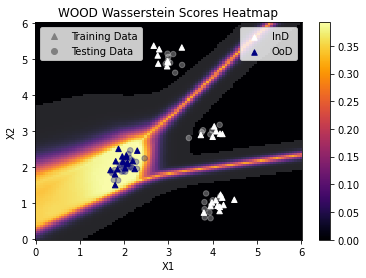

In [78]:
fig, ax = plt.subplots()
plt.pcolormesh(xi, yi, si.reshape((m, m)).T, shading='auto',cmap='inferno', alpha=1)
plt.colorbar()
plt.pcolormesh(xi, yi, mask.reshape((m, m)).T, shading='auto',cmap='gray', alpha=0.15)
# InD and OoD
ind_idx = np.random.choice(len(IND_X), n_ind, replace=False)
ood_idx = np.random.choice(len(OOD_X), n_ind, replace=False)
scatter = plt.scatter(IND_X[:,0][ind_idx], IND_X[:,1][ind_idx], c='white', label ="InD", marker='^',sizes=[30]*len(IND_X), alpha=1)
plt.scatter(OOD_BATCH[:,0], OOD_BATCH[:,1], c='navy', label="OoD",marker='^', sizes=[30]*len(OOD_X), alpha=1)
plt.scatter(IND_X_TEST[:,0][ind_idx], IND_X_TEST[:,1][ind_idx], c='white', sizes=[30]*len(IND_X), alpha=0.3)
plt.scatter(OOD_X[:,0][ood_idx], OOD_X[:,1][ood_idx], c='navy', sizes=[30]*len(OOD_X), alpha=0.3)
plt.title(f"WOOD Wasserstein Scores Heatmap")
plt.xlabel("X1")
plt.ylabel("X2")
# plt.annotate('OoD', xy=(1, 1), xytext =(1, 1), color='white') 
leg = plt.legend()
ax.add_artist(leg)
h = [plt.plot([],[], color="gray", marker=mk, ls="",ms=6)[0] for mk in ['^', 'o']]
plt.legend(handles=h, labels=['Training Data', 'Testing Data'], loc='upper left')
# plt.legend()
# plt.savefig(f"simulation_log/plot/example_wood_old.jpg", dpi=1500)